In [1]:
from google.colab import drive
import os
import glob
import pandas as pd

drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/data-science-veiculos-poluicao'
os.chdir(folder_path)

print(os.listdir())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['senatran', 'iema', 'iema-agg', 'senatran-agg', 'iema-2.ipynb', 'poluentes_anual.csv', 'detran', 'ARQUIVO', 'idades_veiculos_anual.csv', 'ano_modelo.ipynb', 'anp', 'combustiveis.csv', 'combustiveis.ipynb', 'panel_idade_poluicao_combusteiveis.ipynb', 'cidades_lookup.csv']


In [2]:
poluentes_df = pd.read_csv('poluentes_anual.csv')
idades_df = pd.read_csv('idades_veiculos_anual.csv')
combustiveis_df = pd.read_csv('combustiveis.csv')

print("Head of poluentes_df:")
display(poluentes_df.head())

print("\nHead of idades_df:")
display(idades_df.head())

print("\nHead of combustiveis_df:")
display(combustiveis_df.head())

Head of poluentes_df:


,Unnamed: 0,cidade,ano,CO,FMC,MP10,MP2.5,NO,NO2,O3,PTS,SO2
0,0,AMERICANA,2015,NaN,NaN,28.969444,NaN,NaN,NaN,22.457971,NaN,NaN
1,1,AMERICANA,2016,NaN,NaN,25.913889,NaN,NaN,NaN,39.695946,NaN,NaN
2,2,AMERICANA,2017,NaN,NaN,26.327778,NaN,NaN,NaN,53.165217,NaN,NaN
3,3,AMERICANA,2018,NaN,NaN,27.757660,NaN,NaN,NaN,57.604651,NaN,NaN
4,4,AMERICANA,2019,NaN,NaN,17.991304,NaN,NaN,NaN,53.894260,NaN,NaN



Head of idades_df:


,cidade,ano,0a1,1a2,2a3,3a4,4a5,5a6,6a7,7a8,8a9,9a10,acima10
0,AMERICANA,2015,4304.0,7780.0,9611.0,8857.0,9712.0,9673.0,8366.0,9885.0,9279.0,7195.0,80666.0
1,AMERICANA,2016,3328.0,5680.0,7974.0,9699.0,8874.0,9737.0,9548.0,8403.0,9852.0,9244.0,86724.0
2,AMERICANA,2017,4075.0,4377.0,5959.0,8101.0,9672.0,8862.0,9690.0,9528.0,8305.0,9716.0,94948.0
3,AMERICANA,2018,5157.0,5203.0,4632.0,6017.0,8057.0,9631.0,8789.0,9661.0,9442.0,8264.0,103249.0
4,AMERICANA,2019,5229.0,6631.0,5564.0,4704.0,6034.0,8038.0,9444.0,8691.0,9524.0,9232.0,110020.0



Head of combustiveis_df:


,cidade,ano,gasolina,diesel,etanol
0,AMERICANA,2015,60512400.0,69038912.0,83800000.0
1,AMERICANA,2016,66521022.0,68943735.0,75242800.0
2,AMERICANA,2017,76911731.0,72859597.0,66771836.0
3,AMERICANA,2018,54104808.0,85675593.0,80498487.0
4,AMERICANA,2019,49384500.0,93079700.0,89251290.0


In [3]:
merged_df = pd.merge(combustiveis_df, idades_df, on=['cidade', 'ano'])

print("\nHead of merged_df:")
display(merged_df.head())


Head of merged_df:


,cidade,ano,gasolina,diesel,etanol,0a1,1a2,2a3,3a4,4a5,5a6,6a7,7a8,8a9,9a10,acima10
0,AMERICANA,2015,60512400.0,69038912.0,83800000.0,4304.0,7780.0,9611.0,8857.0,9712.0,9673.0,8366.0,9885.0,9279.0,7195.0,80666.0
1,AMERICANA,2016,66521022.0,68943735.0,75242800.0,3328.0,5680.0,7974.0,9699.0,8874.0,9737.0,9548.0,8403.0,9852.0,9244.0,86724.0
2,AMERICANA,2017,76911731.0,72859597.0,66771836.0,4075.0,4377.0,5959.0,8101.0,9672.0,8862.0,9690.0,9528.0,8305.0,9716.0,94948.0
3,AMERICANA,2018,54104808.0,85675593.0,80498487.0,5157.0,5203.0,4632.0,6017.0,8057.0,9631.0,8789.0,9661.0,9442.0,8264.0,103249.0
4,AMERICANA,2019,49384500.0,93079700.0,89251290.0,5229.0,6631.0,5564.0,4704.0,6034.0,8038.0,9444.0,8691.0,9524.0,9232.0,110020.0


# Preparação final do dataset antes do início da regressão

In [4]:
pollutant = 'MP10'

df_pollutant = pd.merge(merged_df, poluentes_df.dropna(subset=[pollutant])[['cidade', 'ano', pollutant]], on=['cidade', 'ano'], how='inner')

df_pollutant['covid19'] = df_pollutant['ano'].apply(lambda x: 1 if x in [2020, 2021] else 0)

# Reorder columns to place 'covid' between 'acima10' and 'CO'
cols = df_pollutant.columns.tolist()
acima10_index = cols.index('acima10')
co_index = cols.index(pollutant)

# Insert 'covid' between 'acima10' and 'CO'
cols.insert(co_index, cols.pop(cols.index('covid19')))

df_pollutant = df_pollutant[cols]

display(df_pollutant.head())

,cidade,ano,gasolina,diesel,etanol,0a1,1a2,2a3,3a4,4a5,5a6,6a7,7a8,8a9,9a10,acima10,covid19,MP10
0,AMERICANA,2015,60512400.0,69038912.0,83800000.0,4304.0,7780.0,9611.0,8857.0,9712.0,9673.0,8366.0,9885.0,9279.0,7195.0,80666.0,0,28.969444
1,AMERICANA,2016,66521022.0,68943735.0,75242800.0,3328.0,5680.0,7974.0,9699.0,8874.0,9737.0,9548.0,8403.0,9852.0,9244.0,86724.0,0,25.913889
2,AMERICANA,2017,76911731.0,72859597.0,66771836.0,4075.0,4377.0,5959.0,8101.0,9672.0,8862.0,9690.0,9528.0,8305.0,9716.0,94948.0,0,26.327778
3,AMERICANA,2018,54104808.0,85675593.0,80498487.0,5157.0,5203.0,4632.0,6017.0,8057.0,9631.0,8789.0,9661.0,9442.0,8264.0,103249.0,0,27.757660
4,AMERICANA,2019,49384500.0,93079700.0,89251290.0,5229.0,6631.0,5564.0,4704.0,6034.0,8038.0,9444.0,8691.0,9524.0,9232.0,110020.0,0,17.991304


In [5]:
import statsmodels.api as sm

# Define the dependent and independent variables
dependent_var = df_pollutant[pollutant]
independent_vars = df_pollutant[['gasolina', 'diesel', 'etanol', '0a1', '1a2', '2a3', '3a4', '4a5', '5a6', '6a7', '7a8', '8a9', '9a10', 'acima10', 'covid19']]

# Add a constant to the independent variables
independent_vars = sm.add_constant(independent_vars)

# Fit the pooled OLS model
pooled_ols_model = sm.OLS(dependent_var, independent_vars).fit()

# Print the regression summary
print(pooled_ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MP10   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     4.316
Date:                Tue, 09 Sep 2025   Prob (F-statistic):           2.96e-07
Time:                        02:41:12   Log-Likelihood:                -1081.8
No. Observations:                 298   AIC:                             2196.
Df Residuals:                     282   BIC:                             2255.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.3006      0.902     26.938      0.0

In [6]:
# Create dummy variables for 'cidade'
city_dummies = pd.get_dummies(df_pollutant['cidade'], prefix='cidade', drop_first=True)

# Concatenate the dummy variables with the independent variables
independent_vars_fe = pd.concat([independent_vars, city_dummies], axis=1)

# Fit the fixed effects OLS model (LSDV approach)
#fixed_effects_model = sm.OLS(dependent_var, independent_vars_fe).fit()

# Print the regression summary
#print(fixed_effects_model.summary())

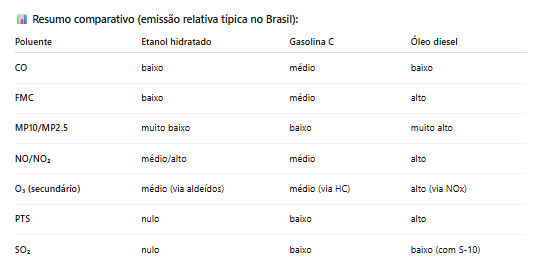

In [7]:
# Check the data types of independent_vars_fe
#print(independent_vars_fe.dtypes)

# Convert relevant columns to numeric, coercing errors, and explicitly convert boolean to int
for col in independent_vars_fe.columns:
    if independent_vars_fe[col].dtype == 'object':
        independent_vars_fe[col] = pd.to_numeric(independent_vars_fe[col], errors='coerce')
    elif pd.api.types.is_bool_dtype(independent_vars_fe[col]):
        independent_vars_fe[col] = independent_vars_fe[col].astype(int)


# Check the data types again after conversion
#print("\nData types after conversion:")
#print(independent_vars_fe.dtypes)

# Fit the fixed effects OLS model (LSDV approach) again
fixed_effects_model = sm.OLS(dependent_var, independent_vars_fe).fit()

# Print the regression summary
print(fixed_effects_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MP10   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     15.41
Date:                Tue, 09 Sep 2025   Prob (F-statistic):           1.46e-53
Time:                        02:41:12   Log-Likelihood:                -888.42
No. Observations:                 298   AIC:                             1889.
Df Residuals:                     242   BIC:                             2096.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           